In [490]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
from sklearn.model_selection import train_test_split
from sklearn.compose import TransformedTargetRegressor
from sklearn.compose import ColumnTransformer
from sklearn.compose import make_column_selector as selector
from sklearn.preprocessing import PowerTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.impute import KNNImputer
from sklearn.feature_selection import VarianceThreshold
from sklearn.decomposition import PCA
import datetime
from datetime import timedelta
import ast
import json    
import missingno as msno
import seaborn as sns
import arabic_reshaper
from bidi.algorithm import get_display
from sklearn.impute import SimpleImputer
# from sklearn_pandas import CategoricalImputer
from sklearn.impute import KNNImputer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import FunctionTransformer
from sklearn.pipeline import Pipeline
from sklearn import preprocessing
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix, precision_score, accuracy_score, recall_score, f1_score
from sklearn.linear_model import LogisticRegression



# feature engineering 

In [491]:
df = pd.read_csv('../data/aqar.csv')

## dealing with nulls 

In [492]:
df.isnull().sum()

Unnamed: 0            0
user_id               0
id                    0
title                 0
price                 0
content              94
imgs                643
refresh               0
beds                  0
livings               2
wc                    0
area                175
street_width        210
age                 705
last_update           0
ketchen              17
ac                   19
furnished            45
location              0
path                  0
district              0
width              2100
length             2100
advertiser_type     240
create_time           0
review              399
profileImg         2746
UserName             93
iam_verified        146
DayOfRent             0
onMarket              0
timeBeforeRent        0
dtype: int64

<AxesSubplot:>

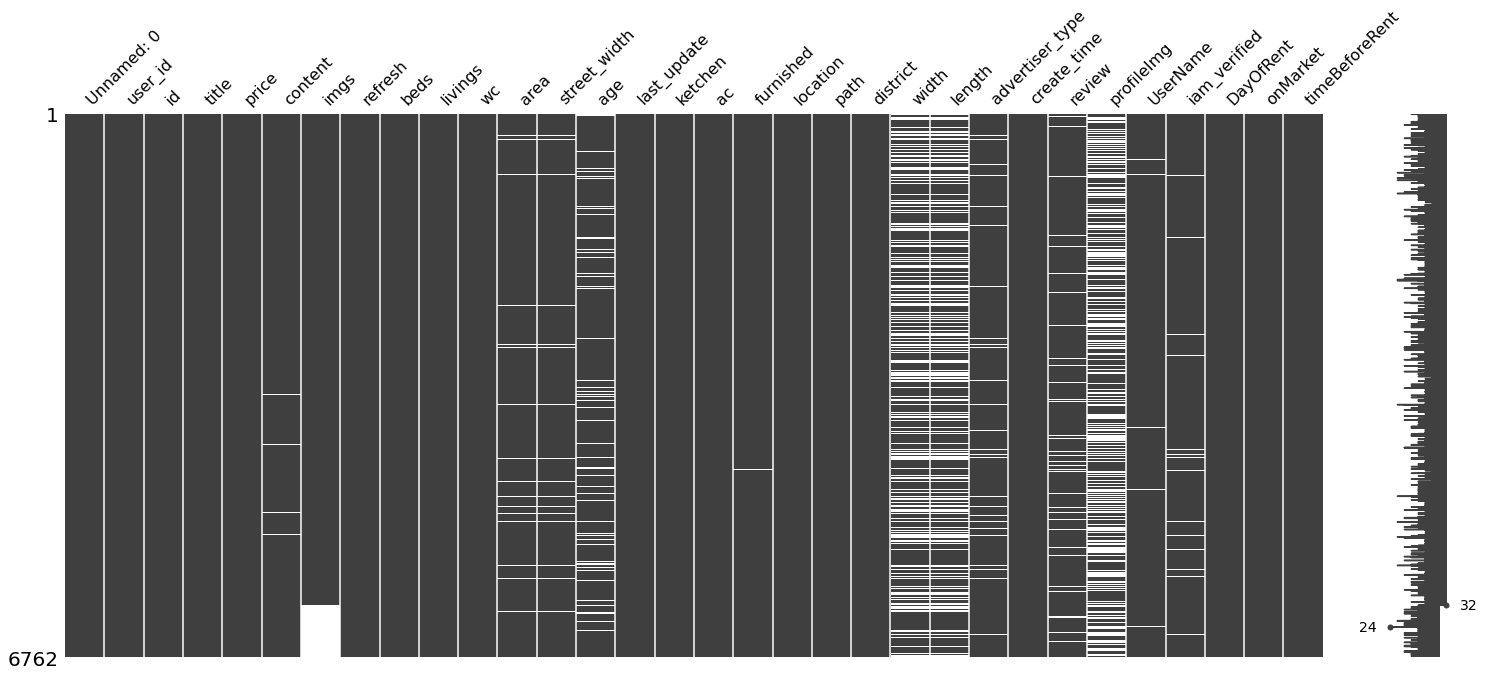

In [493]:
msno.matrix(df)


fill na with null becouse there it eather you have a profile image or not 

In [494]:
df['profileImg'].fillna(False , inplace=True)

i don't need the jpg link i just want to know if the dealer has img or not 

In [495]:
for index , row in df.iterrows()   :
    # print(row['profileImg'] )
     if (row['profileImg'] != False) :
        df['profileImg'][index] = True

/tmp/ipykernel_715/3280180632.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [496]:
df['profileImg'].value_counts()

True     4016
False    2746
Name: profileImg, dtype: int64

for the content i don't care about the content it self sense there isn't a lot of time for NLP i want to see if how much did the dealer wrote so 
<br></br>i fill the null with zero since  zero mean there isn't contet (i check this manually  ) 

In [497]:
df['content'].fillna('0' , inplace=True)

took the length of the rest of the observatoins 

In [498]:
for index , row in df.iterrows():
    df['content'][index] = len(row['content'])

/tmp/ipykernel_715/3469686288.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


filled of the verified with False (check manually that this is true and also make since(if verified then it to have it ))

In [499]:
df['iam_verified'].value_counts()

True     6604
False      12
Name: iam_verified, dtype: int64

In [500]:
df['iam_verified'].fillna(False , inplace=True)

In [501]:
df['iam_verified'].value_counts()

True     6604
False     158
Name: iam_verified, dtype: int64

In [502]:
a = df['imgs'][0]
a

"['014958174_1659666836308.jpg', '014958178_1659666836077.jpg', '014958172_1659666837295.jpg']"

for imgs unfortunately  there is no lot of time for computer vision so i want to see how many imgs there are in each post 

NA means there are no photo are added 

In [503]:
df['imgs'].fillna(0 , inplace = True)

In [504]:
df['imgs']

0       ['014958174_1659666836308.jpg', '014958178_165...
1       ['004966630_1659781493595.jpg', '004966636_165...
2       ['023243548_1658701693777.jpg', '023243549_165...
3       ['019065004_1659758037501.jpg', '019065000_165...
4       ['017415629_1657025837185.jpg', '017415620_165...
                              ...                        
6757                                                    0
6758                                                    0
6759                                                    0
6760                                                    0
6761                                                    0
Name: imgs, Length: 6762, dtype: object

it shows as list so convert the sting to a list  then took the length this will give me how many imgs in each post

In [505]:
for index , row in df.iterrows():
    if row['imgs'] == 0 :
        continue
    else:
        a= row['imgs']
        df['imgs'][index] = len(ast.literal_eval(a))

/tmp/ipykernel_715/4095940630.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


the mode is 8 

In [506]:
df['imgs'].value_counts()

8     880
0     643
7     539
6     505
5     482
9     433
10    397
4     386
1     322
12    318
11    316
3     269
13    213
14    170
15    154
16    145
2     129
18     90
17     86
19     59
21     36
20     36
22     32
23     23
24     21
26     21
30     15
27     14
25     10
28      9
29      7
31      1
37      1
Name: imgs, dtype: int64

In [507]:
try:
    df.drop(['Unnamed: 0'] , axis=1 , inplace=True)
except:
    t=1

In [508]:
df[['width' , 'length' , 'area']].isna().sum()

width     2100
length    2100
area       175
dtype: int64

the coorelation is high between the length and area and there are many features that is missing so i decided to remove (length , width) 

In [509]:
rs = np.random.RandomState(0)
# df = pd.DataFrame(rs.rand(10, 10))
corr = df[['width' , 'length' , 'area']].corr()
corr.style.background_gradient(cmap='coolwarm')

,width,length,area
width,1.000000,0.031396,0.035508
length,0.031396,1.000000,0.999633
area,0.035508,0.999633,1.000000


In [510]:
df.drop(['width', 'length'] , axis=1 , inplace=True)

In [511]:
df.isna().sum()

user_id              0
id                   0
title                0
price                0
content              0
imgs                 0
refresh              0
beds                 0
livings              2
wc                   0
area               175
street_width       210
age                705
last_update          0
ketchen             17
ac                  19
furnished           45
location             0
path                 0
district             0
advertiser_type    240
create_time          0
review             399
profileImg           0
UserName            93
iam_verified         0
DayOfRent            0
onMarket             0
timeBeforeRent       0
dtype: int64

In [512]:
df['UserName'].isna().sum()

93

## for UserName column there are some of the featutre are missing but it is the same as user_id so i decide to remove the userName column

In [513]:
df['UserName'].value_counts()

‏مؤسسة الحلم العربي              251
بوابه النهضه للخدمات العقاريه    163
مكتب عقاري                       108
عقار جديد                         88
مكتب عقاري مميز                   88
                                ... 
0555429978                         1
Sultanh                            1
hhs                                1
أبو سلطان                          1
المشاريع الناجحة                   1
Name: UserName, Length: 1472, dtype: int64

In [514]:
df['user_id'].value_counts() 

1992649    251
901785     162
1958104     96
2072661     88
940589      88
          ... 
1747849      1
393829       1
2590825      1
1019200      1
292698       1
Name: user_id, Length: 1777, dtype: int64

In [515]:
df.loc[df['user_id'] == 1992649]['UserName']

41      ‏مؤسسة الحلم العربي
159     ‏مؤسسة الحلم العربي
180     ‏مؤسسة الحلم العربي
242     ‏مؤسسة الحلم العربي
264     ‏مؤسسة الحلم العربي
               ...         
6633    ‏مؤسسة الحلم العربي
6648    ‏مؤسسة الحلم العربي
6693    ‏مؤسسة الحلم العربي
6731    ‏مؤسسة الحلم العربي
6742    ‏مؤسسة الحلم العربي
Name: UserName, Length: 251, dtype: object

In [516]:
df.drop(['UserName'], axis=1 , inplace=True)

for the review i fill the NAs with the median since it is a skewed distribution

<AxesSubplot:>

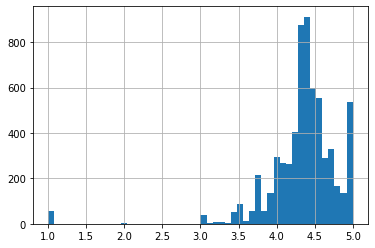

In [517]:
df["review"].hist(bins=50)

In [518]:
df["review"].fillna(df.review.median() , inplace=True)

<AxesSubplot:>

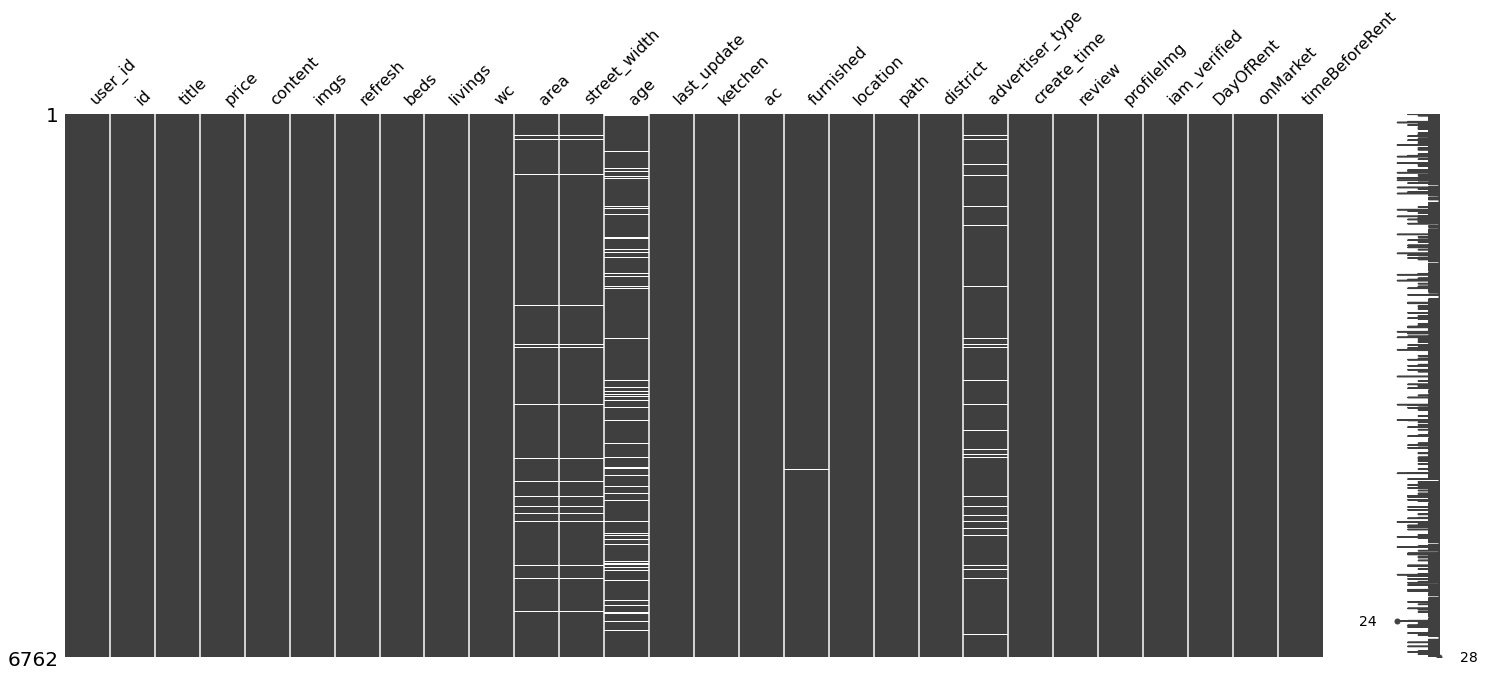

In [519]:
msno.matrix(df)


In [520]:
df['area' ].isnull().sum()

175

In [521]:
df['street_width' ].isnull().sum()

210

all value that are null in area is null in street_width except of 35 so i decided instead of doing any Imputation i dropped these nulls 

In [522]:


df[['area' , 'street_width']].isnull().apply(lambda x: all(x), axis=1).sum()

175

In [523]:
df = df.dropna(subset=['area' , 'street_width'])

In [524]:
df['furnished'].isna().sum()

23

In [525]:
df['furnished'].value_counts()

0.0    6026
1.0     503
Name: furnished, dtype: int64

by observation on 50% of the nulls value that are still existing i filled the value with 0  

In [526]:
df['furnished'].fillna(0 , inplace=True)

In [527]:
df['advertiser_type'].isna().sum()

168

In [528]:
df['age']

0        9.0
1       12.0
2        NaN
3        0.0
4        9.0
        ... 
6757     0.0
6758    25.0
6759     5.0
6760     1.0
6761     3.0
Name: age, Length: 6552, dtype: float64

In [529]:
df['age'].isna().sum()

670

right skweed so i choose to use median 

<AxesSubplot:>

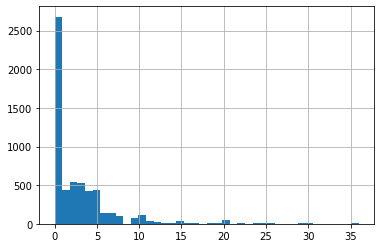

In [530]:
df['age'].hist(bins=40)

In [531]:
df['age'].median()

1.0

In [532]:
df['age'].isna().sum()

670

In [533]:
df['age'].median()

1.0

In [534]:
df['age'].fillna(df['age'].median() , inplace=True)

<AxesSubplot:>

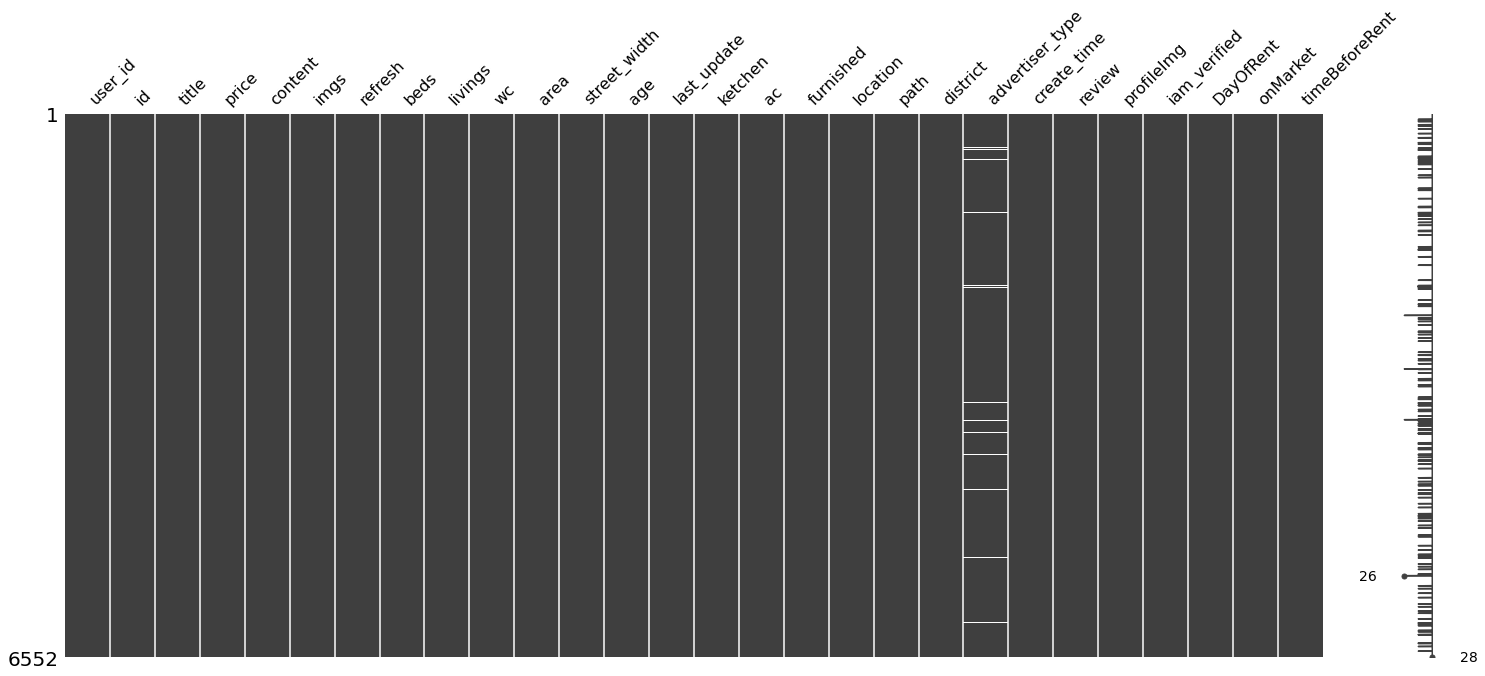

In [535]:
msno.matrix(df)


In [536]:
df['furnished'].value_counts()

0.0    6049
1.0     503
Name: furnished, dtype: int64

filled the data with the mode

In [537]:
df['furnished'].isna().sum()

0

In [538]:
df['furnished'].fillna(0 , inplace=True)

i fill the data with the previous row for advertiser_type

In [539]:
df['advertiser_type'].isna().sum()

168

In [540]:
df['advertiser_type'].value_counts()

exclusive_marketer    2479
normal_marketer       1685
owner                 1620
agent                  600
Name: advertiser_type, dtype: int64

In [541]:
df['advertiser_type']= df['advertiser_type'].fillna(method='pad')

In [542]:
df.isna().sum()

user_id            0
id                 0
title              0
price              0
content            0
imgs               0
refresh            0
beds               0
livings            1
wc                 0
area               0
street_width       0
age                0
last_update        0
ketchen            5
ac                 6
furnished          0
location           0
path               0
district           0
advertiser_type    0
create_time        0
review             0
profileImg         0
iam_verified       0
DayOfRent          0
onMarket           0
timeBeforeRent     0
dtype: int64

fill the rest with the previous row 

In [543]:
df= df.fillna(method='pad')

# feature engineering

we don't need this feature since we add lat as new column

In [544]:
df.drop(['location'] , axis = 1 , inplace=True)

## convert strings to numrical

In [545]:
df['title']

0       شقة للإيجار في شارع التغلبي ، حي النظيم ، الري...
1       شقة للإيجار في شارع الاقتصاد ، حي الفيحاء ، ال...
2       شقة للإيجار في شارع أبي الحسن الأسفرائيني ، حي...
3       شقة للإيجار في شارع أسيد بن ثعلبة ، حي العقيق ...
4       شقة للإيجار في شارع العباس بن عبدالمطلب ، حي ا...
                              ...                        
6757    شقة للإيجار في شارع مطلق بن عجيبان ، حي النرجس...
6758    شقة للإيجار في شارع الحويرة ، حي غبيرة ، الريا...
6759    شقة للإيجار في شارع جليل ، حي اليرموك ، الرياض...
6760    شقة للإيجار في شارع محمد بن رزين ، حي النرجس ،...
6761    شقة للإيجار في شارع السلامه ، حي النرجس ، الري...
Name: title, Length: 6552, dtype: object

we can't make a NLP for this feature so i decided to take the length of the text 

In [546]:
for index , row in df.iterrows():
    if row['title'] == 0 :
        continue
    else:
        # a= 
        df['title'][index] = len(row['title'])

/tmp/ipykernel_715/1017281869.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [547]:
df['title'].value_counts()

57    821
58    414
59    406
56    359
62    317
     ... 
34      1
97      1
35      1
96      1
29      1
Name: title, Length: 70, dtype: int64

##  refresh and last update 

In [548]:
(df['refresh']==df['last_update'])

0        True
1       False
2        True
3       False
4        True
        ...  
6757     True
6758     True
6759    False
6760     True
6761     True
Length: 6552, dtype: bool

In [549]:
df[df['refresh']==df['last_update']].value_counts().sum()

5318

In [550]:
df[df['refresh']==df['last_update']].value_counts().sum()/len(df)

0.8116605616605617

81% of the observation are duplicates so i desides to remove the refresh column (the rest i belive there small changes +-5 second)

In [551]:
df.drop('refresh', axis=1 , inplace=True)

in the EDA we can see that these values are making the data unpalnced 

In [552]:
df[df['area'] > 1000].shape[1]

26

In [553]:
df = df[df['area'] <= 1000]

from the path column i want it shows somthing like this 

In [554]:
df['path'][0] 

'/شقق-للإيجار/الرياض/شرق-الرياض/حي-النظيم/شارع-التغلبي-حي-النظيم-الرياض-الرياض-4596035'

in the site they divide there pages into category/city/in-which-side-of-the-city/district/title/id

category {apartment , lands .... etc} 

in-which-side-of-the-city : {north , center , west ... }

district : Neighborhood

all these info i have except of the in-which-side-of-the-city  is the apartment so i create the new column for it

In [555]:
df['zone'] = ''

In [556]:
for index , row in df.iterrows():
    a = row['path'].split('/')[3]
    df['zone'][index] = a.split('-')[0]


/tmp/ipykernel_715/233973366.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


North

East

West

center

South

In [557]:
df['zone'].value_counts()

شمال    3524
شرق     2256
غرب      521
وسط      123
جنوب     107
Name: zone, dtype: int64

i don't need the path anymore

In [558]:
df.drop('path' , axis=1 , inplace=True)

In [559]:
# df.loc[df["zone"] == "شمال", "zone"] = 1
# df.loc[df["zone"] == "شرق", "zone"] = 2
# df.loc[df["zone"] == "غرب", "zone"] = 3
# df.loc[df["zone"] == "وسط", "zone"] = 4
# df.loc[df["zone"] == "جنوب", "zone"] = 5

شمال    3524
شرق     2256
غرب      521
وسط      123
جنوب     107
Name: zone, dtype: int64

In [ ]:
label_encoder = preprocessing.LabelEncoder()


In [562]:
df['zone'] = label_encoder.fit_transform(df['zone'])

In [563]:
df['zone'].value_counts()

2    3524
1    2256
3     521
4     123
0     107
Name: zone, dtype: int64

In [564]:
df['district'] = label_encoder.fit_transform(df['district'])

In [565]:
df['district'].value_counts()

81     796
44     595
70     564
95     435
94     328
      ... 
54       1
18       1
106      1
60       1
71       1
Name: district, Length: 127, dtype: int64

we have to deal with datetime i decided to create new columns for year , month , day 

In [567]:

df['createYEAR'] = 0
df['createMONTH'] = 0
df['createDAY']= 0
df['lUpdateYEAR']= 0
df['lUpdateMONTH'] = 0
df['lUpdateDAY'] = 0
df['createDAY']= 0 

In [568]:
for index , row in df.iterrows():
    df['createYEAR'][index] = df['create_time'][index][7:9]
    df['createDAY'][index]  = df['create_time'][index][10:12]
    df['createMONTH'][index] =  df['create_time'][index][7:9]

/tmp/ipykernel_715/59881292.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/tmp/ipykernel_715/59881292.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/tmp/ipykernel_715/59881292.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [ ]:
# New_df['create_time'] = New_df['create_time'].astype('datetime64' )

In [572]:
for index , row in df.iterrows():
    df['lUpdateYEAR'][index] = df['last_update'][index][7:9]
    df['lUpdateDAY'][index]  = df['last_update'][index][10:12]
    df['lUpdateMONTH'][index] =  df['last_update'][index][7:9]

/tmp/ipykernel_715/3723726410.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/tmp/ipykernel_715/3723726410.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/tmp/ipykernel_715/3723726410.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [573]:

df['createYEAR'] = df['createYEAR'].astype('int64')
df['createMONTH'] = df['createMONTH'].astype('int64')
df['createDAY']=  df['createDAY'].astype('int64')
df['lUpdateYEAR']=  df['lUpdateYEAR'].astype('int64')
df['lUpdateMONTH'] = df['lUpdateMONTH'].astype('int64')
df['lUpdateDAY'] = df['lUpdateDAY'].astype('int64')
df['createDAY']=   df['createDAY'].astype('int64')

drop previous column

In [577]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6531 entries, 0 to 6761
Data columns (total 30 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   user_id          6531 non-null   int64  
 1   id               6531 non-null   int64  
 2   title            6531 non-null   object 
 3   price            6531 non-null   int64  
 4   content          6531 non-null   int64  
 5   imgs             6531 non-null   int64  
 6   beds             6531 non-null   int64  
 7   livings          6531 non-null   float64
 8   wc               6531 non-null   int64  
 9   area             6531 non-null   float64
 10  street_width     6531 non-null   float64
 11  age              6531 non-null   float64
 12  ketchen          6531 non-null   float64
 13  ac               6531 non-null   float64
 14  furnished        6531 non-null   float64
 15  district         6531 non-null   int64  
 16  advertiser_type  6531 non-null   object 
 17  review        

In [578]:
try:
    df.drop(['create_time' , 'last_update'] ,axis=1 , inplace=True)
except:
    XX = 1

create the target column that is depends on DayOfRent

In [580]:
df['isRent'] = 0
df['isRent'] = np.where(  df['DayOfRent'] == 0 ,  False , True)

In [582]:
df['isRent'].value_counts()

False    4138
True     2393
Name: isRent, dtype: int64

In [583]:
df.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 6531 entries, 0 to 6761
Data columns (total 31 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   user_id          6531 non-null   int64  
 1   id               6531 non-null   int64  
 2   title            6531 non-null   object 
 3   price            6531 non-null   int64  
 4   content          6531 non-null   int64  
 5   imgs             6531 non-null   int64  
 6   beds             6531 non-null   int64  
 7   livings          6531 non-null   float64
 8   wc               6531 non-null   int64  
 9   area             6531 non-null   float64
 10  street_width     6531 non-null   float64
 11  age              6531 non-null   float64
 12  ketchen          6531 non-null   float64
 13  ac               6531 non-null   float64
 14  furnished        6531 non-null   float64
 15  district         6531 non-null   int64  
 16  advertiser_type  6531 non-null   object 
 17  review        

In [589]:
df.to_csv('../data/ML.csv')

no sign of overfitting.